<div style="text-align: center;">
  <img src="https://github.com/Hack-io-Data/Imagenes/blob/main/01-LogosHackio/logo_naranja@4x.png?raw=true" alt="esquema" />
</div>


# Laboratorio Estadistica Descriptiva

⚠️ Siempre que puedas usa graficas para apoyar tu interpretacion


In [58]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np  
import pandas as pd 


# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns


# librerias para estadisticas 
# ------------------------------------------------------------------------------

import statistics as st 
from scipy import stats  
from scipy.stats import skew,kurtosis # libreria para asimetria y curtosis 


#### Ejercicio 1: 

1.  Dados los siguientes datos: [15, 21, 25, 32, 35, 45, 50, 50, 55, 60]. Crea una funcion que calcule la media, mediana y moda.


In [59]:
datos = [15, 21, 25, 32, 35, 45, 50, 50, 55, 60]

# Función para calcular media, mediana y moda
def calcular_estadisticos(datos):
    media = float(np.mean(datos))
    mediana = float(np.median(datos))
    moda = int(stats.mode(datos, keepdims=True).mode[0]) 
    return media, mediana, moda            

# Calcular estadísticas para los datos iniciales
estadisticas_originales = calcular_estadisticos(datos)
estadisticas_originales

(38.8, 40.0, 50)

2.	Interpretación de la media: ¿Qué sucede si un valor extremo, como 100, se agrega al conjunto de datos anterior? ¿Cómo cambia la media? Explica por qué sucede esto.

In [60]:
# Agregar un valor extremo
datos_extremos = datos + [100]

# Calcular estadisticas para los datos con valor extremo
estadisticas_extremas = calcular_estadisticos(datos_extremos)

estadisticas_originales, estadisticas_extremas

# La media es sensible a los valores extremos, ya que considera todos los valores en su cálculo. 
# Cuando se agrega el 100, la suma total de los valores aumenta, lo que provoca un incremento en la media. 
# Este comportamiento sucede porque la media refleja el promedio de todos los datos, y un valor muy alto o muy bajo influye en ese promedio, desplazándolo hacia el extremo.


((38.8, 40.0, 50), (44.36363636363637, 45.0, 50))


#### Ejercicio 2: 
1. **Cálculo de la varianza y desviación estándar**: Usando los mismos datos de arriba, calcula la **varianza** y la **desviación estándar**.




In [61]:
# Función para calcular varianza y desviación estándar
def calcular_dispersion(datos):
    varianza = np.var(datos, ddof=1) 
    desviacion = np.std(datos, ddof=1)  
    return float(varianza), float(desviacion)

dispersion_original = calcular_dispersion(datos)
dispersion_original

(237.2888888888889, 15.404184135775868)

2. **Comparación de dispersión**: Dado otro conjunto de datos: `[18, 19, 20, 22, 24, 25, 27, 30]`, compara la **dispersión** de este grupo con el conjunto de datos anterior (del Ejercicio 1) calculando la **desviación estándar** de ambos. ¿Qué conjunto tiene mayor dispersión?

In [62]:
datos2=[18, 19, 20, 22, 24, 25, 27, 30]
# Calcular dispersión para datos originales y con valor extremo
dispersion_original = calcular_dispersion(datos)
dispersion_extrema = calcular_dispersion(datos2)

dispersion_original, dispersion_extrema

# El Conjunto del apartado 1 presenta una mayor dispersión que el Nuevo Conjunto, 
# lo que significa que sus valores están más alejados de la media

((237.2888888888889, 15.404184135775868),
 (17.267857142857142, 4.155461122770509))

#### Ejercicio 3:

1. Usa la función correspondiente en Python para calcular la **asimetría** del conjunto de datos: `[10, 20, 20, 20, 25, 30, 35, 40]`. 


In [63]:
# Conjunto de datos
datos3 = [10, 20, 20, 20, 25, 30, 35, 40]

# Calcular asimetría
asimetria_datos = stats.skew(datos3)

print(f"Asimetría del conjunto de datos: {asimetria_datos}")

Asimetría del conjunto de datos: 0.1280077375904375


2. Interpreta el resultado: ¿El conjunto es simétrico, sesgado a la izquierda o a la derecha?

In [64]:
# El resultado de la asimetría es 0.13, lo que indica que el conjunto de datos tiene una ligera asimetría positiva, lo que sugiere sesgo a la derecha.

#### Ejercicio 4: 

1. Calcula la **curtosis** para el conjunto de datos: `[5, 5, 5, 20, 25, 30, 30, 50]`. 

In [65]:
# Conjunto de datos
datos_curtosis = [5, 5, 5, 20, 25, 30, 30, 50]

# Calcular curtosis
curtosis_datos = stats.kurtosis(datos_curtosis)

print(f"Curtosis del conjunto de datos: {curtosis_datos}")

Curtosis del conjunto de datos: -0.7357817008166658


2. ¿El conjunto tiene una curtosis positiva, negativa o es mesocúrtico? Explica qué implica esto sobre la forma de la distribución.

In [66]:
# El conjunto de datos tiene una curtosis negativa de aproximadamente -0.74.
# La distribución es más plana y tiene colas más delgadas que una distribución normal.
# Esto implica que hay menos valores extremos o menos probabilidad de eventos alejados de la media.
# Si la curtosis fuera cercana a 0, la distribución tendría una forma similar a la distribución normal.

#### Ejercicio 5: Caso practico. 


Imagina que una empresa está evaluando el rendimiento de sus empleados para entender la relación entre el tiempo que dedican a su trabajo y el éxito que tienen en términos de ventas. La empresa recopila datos durante un mes, midiendo cuántas **horas trabajó** cada empleado y cuántas **ventas realizaron**. Estos datosa se encuentran en el archivo `rendimiento.csv`

**Horas trabajadas**: 
   - Se midieron las horas trabajadas por un grupo de empleados. En general, la mayoría de los empleados trabajan entre 40 y 60 horas a la semana, con algunos empleados trabajando un poco menos o más.


**Ventas realizadas**:
   - A cada empleado también se le hizo un seguimiento de cuántas ventas realizó. Aunque las ventas están influenciadas por las horas trabajadas, hay cierta **variabilidad**: algunos empleados pueden ser más productivos y vender más en menos tiempo, mientras que otros necesitan trabajar más para alcanzar los mismos resultados.


Resuelve los siguientes puntos:



1. **Cálculo de la media, mediana y moda**:
   - Calcula la **media**, **mediana** y **moda** de las columnas **Horas Trabajadas** y **Ventas Realizadas**.
   - Explica qué información proporciona cada medida en este contexto. Justifica tus conclusiones con representación de graficas. 


In [67]:
# Cargar el conjunto de datos
rendimiento_df = pd.read_csv('rendimiento.csv')
rendimiento_df.head()

,ID,Horas Trabajadas,Ventas Realizadas
0,1,54.967142,48.0
1,2,48.617357,47.0
2,3,56.476885,55.0
3,4,65.230299,61.0
4,5,47.658466,47.0


In [83]:
horas_trabajadas=calcular_estadisticos(rendimiento_df['Horas Trabajadas'])

ventas_realizadas=calcular_estadisticos(rendimiento_df['Ventas Realizadas'])
print('(Media, Mediana y Moda)')
print(horas_trabajadas)
print(ventas_realizadas)

(Media, Mediana y Moda)
(48.96153482605907, 48.730437082202876, 23)
(49.12, 48.0, 47)


In [ ]:
# Media muestra el promedio de horas trabajadas o ventas realizadas.
# Mediana proporciona el valor central, mostrando si la mitad de los empleados trabajan menos de un cierto número de horas o realizan menos ventas que ese valor.
# Moda identifica el número de horas más comúnmente trabajadas o el volumen de ventas más frecuentemente alcanzado.

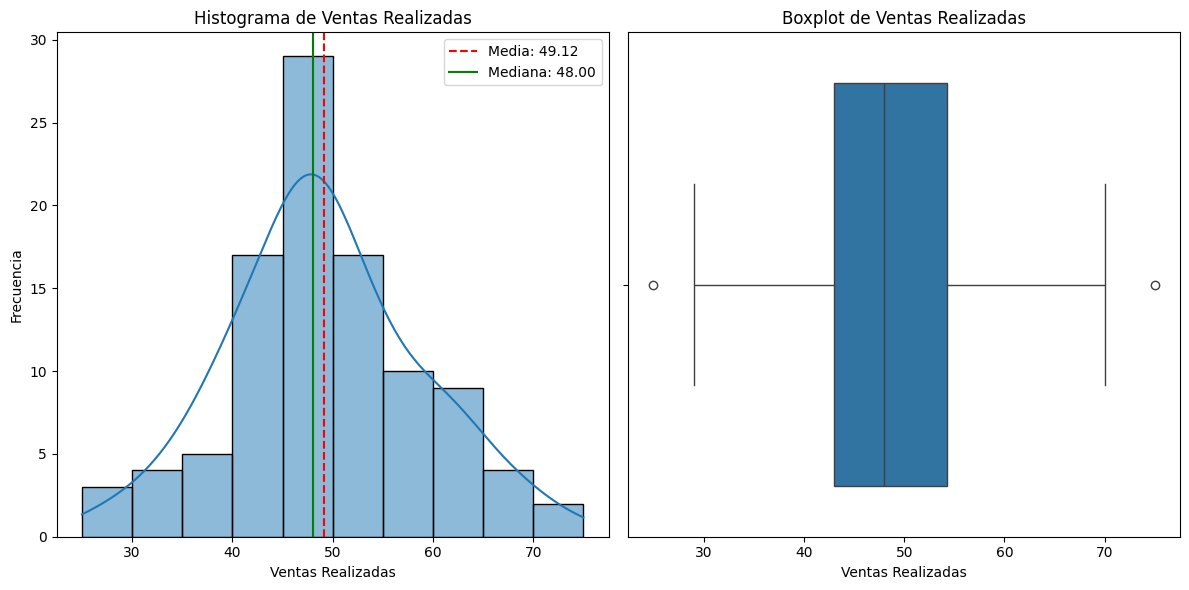

In [ ]:
# Configurar el tamaño de las figuras
plt.figure(figsize=(12, 6))

# Calcular media y mediana
media_ventas = rendimiento_df['Ventas Realizadas'].mean()
mediana_ventas = rendimiento_df['Ventas Realizadas'].median()

# Histograma
plt.subplot(1, 2, 1)
sns.histplot(rendimiento_df['Ventas Realizadas'], bins=10, kde=True)
plt.axvline(media_ventas, color='r', linestyle='--', label=f'Media: {media_ventas:.2f}')
plt.axvline(mediana_ventas, color='g', linestyle='-', label=f'Mediana: {mediana_ventas:.2f}')
plt.title('Histograma de Ventas Realizadas')
plt.xlabel('Ventas Realizadas')
plt.ylabel('Frecuencia')
plt.legend()

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=rendimiento_df['Ventas Realizadas'])
plt.title('Boxplot de Ventas Realizadas')
plt.xlabel('Ventas Realizadas')

plt.tight_layout()
plt.show()


2. **Comparación de medidas de centralización**:
   - ¿Cómo se diferencian la media y la mediana para los datos de **Ventas Realizadas**? ¿Qué indica esta diferencia sobre la distribución de las ventas?


In [70]:
# La media es ligeramente mayor que la mediana, lo que sugiere una leve asimetría positiva.
# Esto indica que hay algunos valores altos que están tirando de la media hacia arriba, 
# lo cual es típico de una distribución con una cola más larga hacia la derecha (sesgo positivo).

3. **Cálculo de la varianza y desviación estándar**:
   - Calcula la **varianza** y la **desviación estándar** para las columnas **Horas Trabajadas** y **Ventas Realizadas**.
   - ¿Qué conjunto de datos es más disperso? Explica el significado de la dispersión en este caso. Justifica tus conclusiones con representación de graficas. 


In [71]:
# Calculo de varianza y desviación estándar para 'Horas Trabajadas'
var_horas = rendimiento_df['Horas Trabajadas'].var(ddof=1)  # Varianza muestral
std_horas = rendimiento_df['Horas Trabajadas'].std(ddof=1)  # Desviación estándar muestral

# Calculo de varianza y desviación estándar para 'Ventas Realizadas'
var_ventas = rendimiento_df['Ventas Realizadas'].var(ddof=1)  # Varianza muestral
std_ventas = rendimiento_df['Ventas Realizadas'].std(ddof=1)  # Desviación estándar muestral

# Imprimir los resultados
print(f"Varianza Horas Trabajadas: {var_horas}")
print(f"Desviación Estándar Horas Trabajadas: {std_horas}")
print(f"Varianza Ventas Realizadas: {var_ventas}")
print(f"Desviación Estándar Ventas Realizadas: {std_ventas}")

Varianza Horas Trabajadas: 82.476989363016
Desviación Estándar Horas Trabajadas: 9.081684280078008
Varianza Ventas Realizadas: 93.05616161616163
Desviación Estándar Ventas Realizadas: 9.646562165671334


In [84]:
# El conjunto de ventas Realizadas es más disperso que Horas Trabajadas.

# La dispersión mide qué tan lejos están los datos de su valor medio.

# Una alta dispersión en Ventas Realizadas significa que hay una mayor variabilidad en las ventas realizadas por 
# diferentes personas o en diferentes periodos. Esto podría indicar fluctuaciones significativas en el rendimiento de ventas, 
# posiblemente influenciado por factores externos como promociones, demanda del mercado, o habilidades individuales.

# En contraste, una baja dispersión en Horas Trabajadas sugiere que la mayoría de los empleados trabajan un número de horas relativamente consistente, con menos variación.

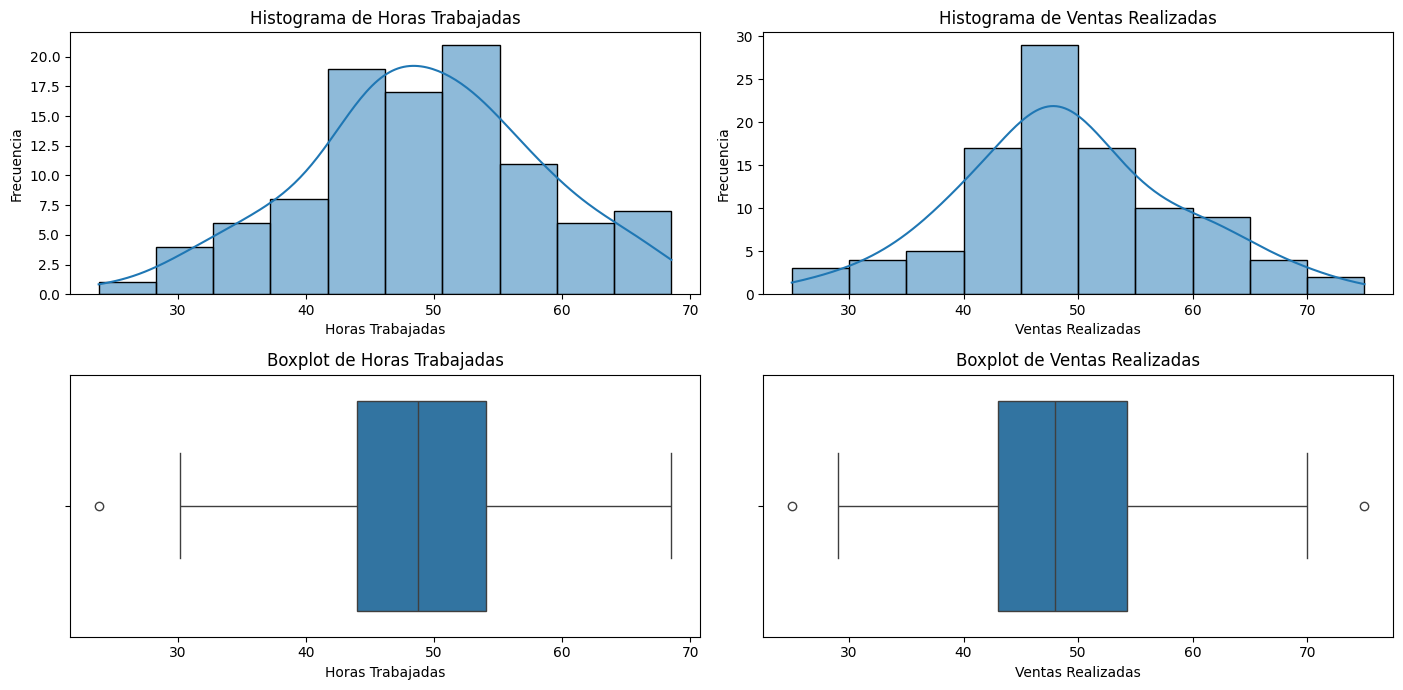

In [72]:
# Configurar el tamaño de las figuras
plt.figure(figsize=(14, 7))

# Histograma de 'Horas Trabajadas'
plt.subplot(2, 2, 1)
sns.histplot(rendimiento_df['Horas Trabajadas'], bins=10, kde=True)
plt.title('Histograma de Horas Trabajadas')
plt.xlabel('Horas Trabajadas')
plt.ylabel('Frecuencia')

# Histograma de 'Ventas Realizadas'
plt.subplot(2, 2, 2)
sns.histplot(rendimiento_df['Ventas Realizadas'], bins=10, kde=True)
plt.title('Histograma de Ventas Realizadas')
plt.xlabel('Ventas Realizadas')
plt.ylabel('Frecuencia')

# Boxplot de 'Horas Trabajadas'
plt.subplot(2, 2, 3)
sns.boxplot(x=rendimiento_df['Horas Trabajadas'])
plt.title('Boxplot de Horas Trabajadas')
plt.xlabel('Horas Trabajadas')

# Boxplot de 'Ventas Realizadas'
plt.subplot(2, 2, 4)
sns.boxplot(x=rendimiento_df['Ventas Realizadas'])
plt.title('Boxplot de Ventas Realizadas')
plt.xlabel('Ventas Realizadas')

plt.tight_layout()
plt.show()

4. **Rango y rango intercuartílico**:
   - Calcula el **rango** y el **rango intercuartílico** para ambas columnas. 
   - ¿Qué te dice esto sobre la variabilidad de los datos? Justifica tus conclusiones con representación de graficas. 

In [73]:
# Función para calcular el rango
def calcular_rango(datos):
    return datos.max() - datos.min()

# Calcular el rango
rango_horas = calcular_rango(rendimiento_df['Horas Trabajadas'])
rango_ventas = calcular_rango(rendimiento_df['Ventas Realizadas'])

# Calcular el rango intercuartílico (IQR)
iqr_horas = rendimiento_df['Horas Trabajadas'].quantile(0.75) - rendimiento_df['Horas Trabajadas'].quantile(0.25)
iqr_ventas = rendimiento_df['Ventas Realizadas'].quantile(0.75) - rendimiento_df['Ventas Realizadas'].quantile(0.25)

# Imprimir los resultados
print(f"Rango Horas Trabajadas: {rango_horas}")
print(f"Rango Ventas Realizadas: {rango_ventas}")
print(f"IQR Horas Trabajadas: {iqr_horas}")
print(f"IQR Ventas Realizadas: {iqr_ventas}")

Rango Horas Trabajadas: 44.72023288598683
Rango Ventas Realizadas: 50.0
IQR Horas Trabajadas: 10.06857722508515
IQR Ventas Realizadas: 11.25


Rango:

- El rango de Horas Trabajadas es 44.72, mientras que el de Ventas Realizadas es 50.
- Esto indica que los valores extremos (mínimo y máximo) de Ventas Realizadas están más dispersos que los de Horas Trabajadas.

Rango Intercuartílico (IQR):

- El IQR de Ventas Realizadas es 11.25, mientras que el de Horas Trabajadas es 10.07.
- Lo que sugiere que la dispersión de los valores centrales (entre el primer y tercer cuartil) es ligeramente mayor para Ventas Realizadas.

La variabilidad en Ventas Realizadas es mayor que en Horas Trabajadas. Esto podría deberse a factores externos como fluctuaciones en la demanda, promociones, o diferencias en la eficacia de las estrategias de ventas. En contraste, Horas Trabajadas muestra una rutina más estable y consistente entre los empleados.

Un rango amplio indica alta variabilidad total en los datos. Hay una gran diferencia entre los valores extremos.

Sin embargo un rango estrecho indica baja variabilidad total. Los datos están más concentrados alrededor de un conjunto más limitado de valores.


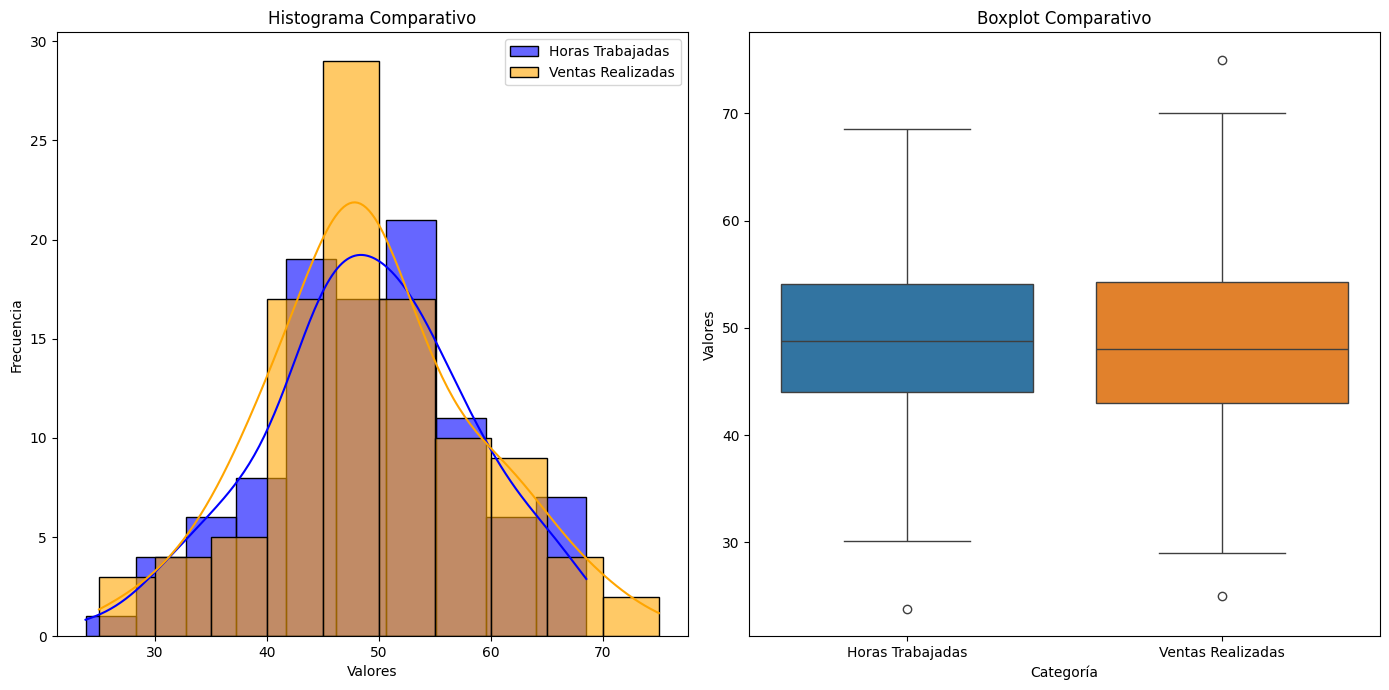

In [74]:
plt.figure(figsize=(14, 7))

# Histograma combinado para 'Horas Trabajadas' y 'Ventas Realizadas'
plt.subplot(1, 2, 1)
sns.histplot(rendimiento_df['Horas Trabajadas'], bins=10, kde=True, label='Horas Trabajadas', color='blue', alpha=0.6)
sns.histplot(rendimiento_df['Ventas Realizadas'], bins=10, kde=True, label='Ventas Realizadas', color='orange', alpha=0.6)
plt.title('Histograma Comparativo')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.legend()

# Boxplot comparativo para 'Horas Trabajadas' y 'Ventas Realizadas'
plt.subplot(1, 2, 2)
sns.boxplot(data=rendimiento_df[['Horas Trabajadas', 'Ventas Realizadas']])
plt.title('Boxplot Comparativo')
plt.xlabel('Categoría')
plt.ylabel('Valores')

plt.tight_layout()
plt.show()

5. **Cálculo de la asimetría**:
   - Usa la función adecuada en Python para calcular la **asimetría** de los datos de **Horas Trabajadas** y **Ventas Realizadas**. 
   - Interpreta si el conjunto de datos es **simétrico**, **sesgado a la izquierda** o **sesgado a la derecha**.

In [75]:
# Calcular la asimetría para 'Horas Trabajadas'
skew_horas = stats.skew(rendimiento_df['Horas Trabajadas'])

# Calcular la asimetría para 'Ventas Realizadas'
skew_ventas = stats.skew(rendimiento_df['Ventas Realizadas'])

# Imprimir los resultados
print(f"Asimetría Horas Trabajadas: {skew_horas}")
print(f"Asimetría Ventas Realizadas: {skew_ventas}")

Asimetría Horas Trabajadas: -0.17526772024434056
Asimetría Ventas Realizadas: 0.18139072143833262


In [76]:
# La asimetria de horas de -0,175 sugiere que hay una pequeña cantidad de valores más bajos que tiran la distribución hacia la izquierda. 
# Aunque la distribución es mayormente simétrica, tiene una leve inclinación hacia valores menores.

# La asimetria de horas de 0,181 indica que hay algunos valores más altos que están tirando la distribución hacia la derecha. 
# Similar al caso anterior, la distribución es casi simétrica pero con una leve inclinación hacia valores más altos.

6. **Cálculo de la curtosis**:
   - Calcula la **curtosis** para ambos conjuntos de datos. ¿Los conjuntos tienen una curtosis positiva, negativa o son mesocúrticos? 
   - Explica qué implica esto sobre la forma de la distribución.

In [77]:
# Calcular curtosis para 'Horas Trabajadas'
kurtosis_horas = stats.kurtosis(rendimiento_df['Horas Trabajadas'])

# Calcular curtosis para 'Ventas Realizadas'
kurtosis_ventas = stats.kurtosis(rendimiento_df['Ventas Realizadas'])

# Imprimir los resultados
print(f"Curtosis Horas Trabajadas: {kurtosis_horas}")
print(f"Curtosis Ventas Realizadas: {kurtosis_ventas}")

Curtosis Horas Trabajadas: -0.15540470774207948
Curtosis Ventas Realizadas: 0.013598589847180875


In [85]:
# En el caso de horas trabajadas la distribución es más plana (platicúrtica), con menos valores extremos y mayor dispersión en torno a la media.
# Sin embargo, el conjunto de ventas Realizadas tiene una distribución similar a la normal (mesocúrtica), con una dispersión equilibrada y una moderada presencia de valores extremos.

7. **Gráfico de dispersión**:
   - Crea un **gráfico de dispersión** entre **Horas Trabajadas** y **Ventas Realizadas**. 
   - ¿Hay alguna correlación entre ambas variables? Explica cómo interpretar la relación entre las dos variables.

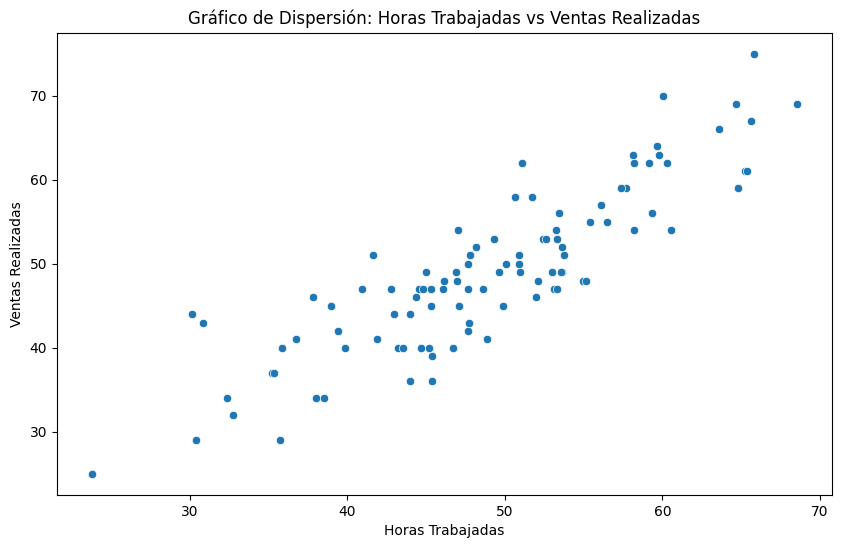

In [78]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Horas Trabajadas', y='Ventas Realizadas', data=rendimiento_df)
plt.title('Gráfico de Dispersión: Horas Trabajadas vs Ventas Realizadas')
plt.xlabel('Horas Trabajadas')
plt.ylabel('Ventas Realizadas')
plt.show()

In [79]:
# En vista del grafico se puede establecer que existe una correlación positiva ya que los puntos suben juntos, 
# significa que más horas trabajadas tienden a generar más ventas.


8. **Análisis exploratorio completo**:
   - Realiza un análisis exploratorio detallado de los datos, incluyendo todas las medidas calculadas en los ejercicios anteriores. Presenta los resultados en forma de un informe claro y visual con gráficos y tablas que resuman las características clave de los datos.




Estadisticos de media, mediana y moda
Horas Trabajadas - Media: 48.96153482605907, Mediana: 48.730437082202876, Moda: 23.802548959102555
Ventas Realizadas - Media: 49.12, Mediana: 48.0, Moda: 47.0

Estadisticos de Dispersión
Horas Trabajadas - Varianza: 82.476989363016, Desviación Estándar: 9.081684280078008, Rango: 44.72023288598683, IQR: 10.06857722508515
Ventas Realizadas - Varianza: 93.05616161616163, Desviación Estándar: 9.646562165671334, Rango: 50.0, IQR: 11.25

Estadisticos de Forma
Horas Trabajadas - Asimetría: -0.17526772024434056, Curtosis: -0.15540470774207948
Ventas Realizadas - Asimetría: 0.18139072143833262, Curtosis: 0.013598589847180875



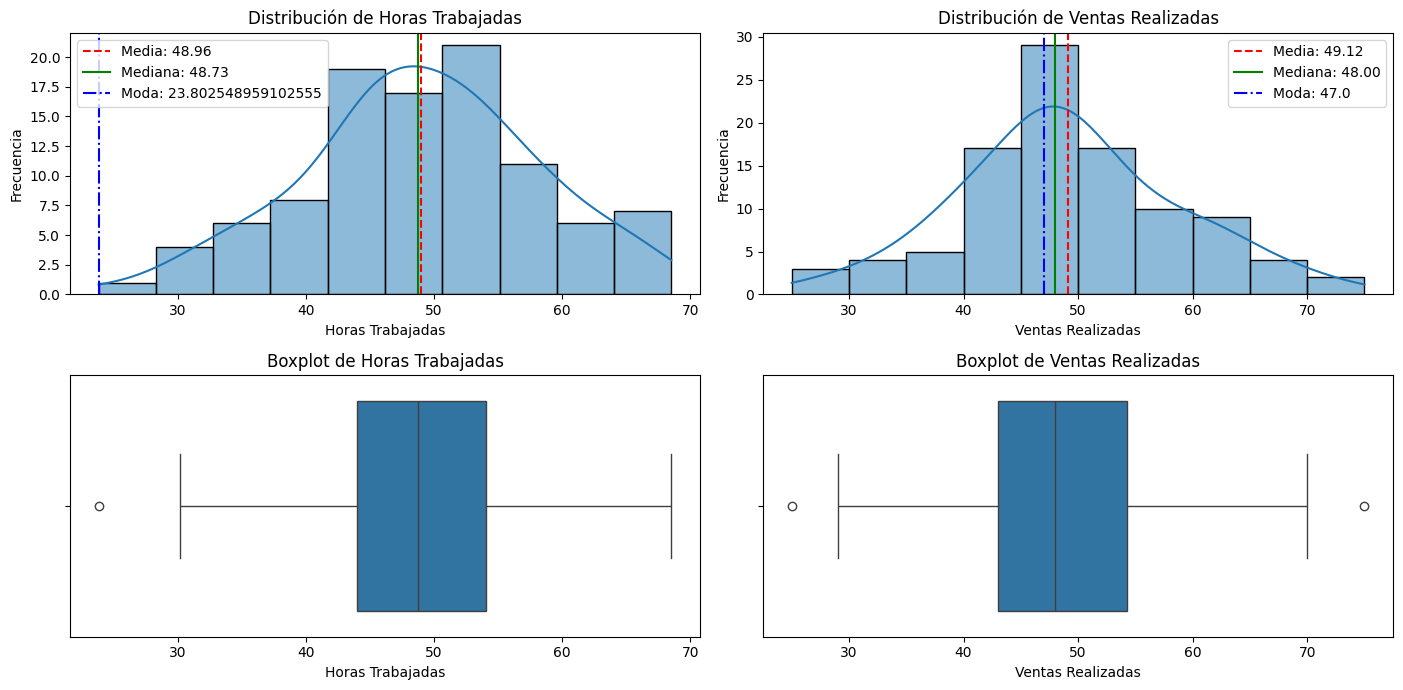

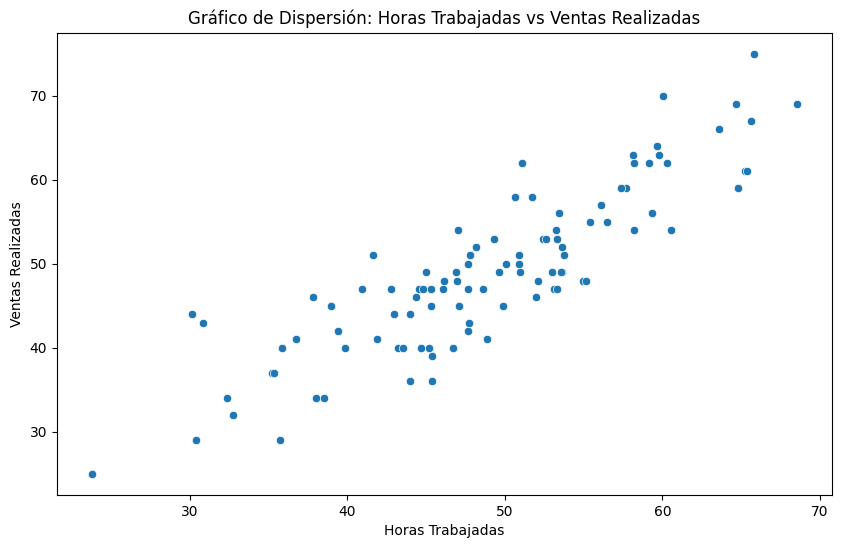

In [86]:
# Cargar el conjunto de datos
rendimiento_df = pd.read_csv('rendimiento.csv')

# 1. Estadisticos de media, mediana y moda
media_horas = rendimiento_df['Horas Trabajadas'].mean()
mediana_horas = rendimiento_df['Horas Trabajadas'].median()
moda_horas = rendimiento_df['Horas Trabajadas'].mode()[0]

media_ventas = rendimiento_df['Ventas Realizadas'].mean()
mediana_ventas = rendimiento_df['Ventas Realizadas'].median()
moda_ventas = rendimiento_df['Ventas Realizadas'].mode()[0]

# 2. Estadisticos de Dispersión
var_horas = rendimiento_df['Horas Trabajadas'].var(ddof=1)
std_horas = rendimiento_df['Horas Trabajadas'].std(ddof=1)
range_horas = rendimiento_df['Horas Trabajadas'].max() - rendimiento_df['Horas Trabajadas'].min()
iqr_horas = rendimiento_df['Horas Trabajadas'].quantile(0.75) - rendimiento_df['Horas Trabajadas'].quantile(0.25)

var_ventas = rendimiento_df['Ventas Realizadas'].var(ddof=1)
std_ventas = rendimiento_df['Ventas Realizadas'].std(ddof=1)
range_ventas = rendimiento_df['Ventas Realizadas'].max() - rendimiento_df['Ventas Realizadas'].min()
iqr_ventas = rendimiento_df['Ventas Realizadas'].quantile(0.75) - rendimiento_df['Ventas Realizadas'].quantile(0.25)

# 3. Estadisticos de Forma
skew_horas = stats.skew(rendimiento_df['Horas Trabajadas'])
kurtosis_horas = stats.kurtosis(rendimiento_df['Horas Trabajadas'])

skew_ventas = stats.skew(rendimiento_df['Ventas Realizadas'])
kurtosis_ventas = stats.kurtosis(rendimiento_df['Ventas Realizadas'])

# Prints
print(f"Estadisticos de media, mediana y moda")
print(f"Horas Trabajadas - Media: {media_horas}, Mediana: {mediana_horas}, Moda: {moda_horas}")
print(f"Ventas Realizadas - Media: {media_ventas}, Mediana: {mediana_ventas}, Moda: {moda_ventas}\n")

print(f"Estadisticos de Dispersión")
print(f"Horas Trabajadas - Varianza: {var_horas}, Desviación Estándar: {std_horas}, Rango: {range_horas}, IQR: {iqr_horas}")
print(f"Ventas Realizadas - Varianza: {var_ventas}, Desviación Estándar: {std_ventas}, Rango: {range_ventas}, IQR: {iqr_ventas}\n")

print(f"Estadisticos de Forma")
print(f"Horas Trabajadas - Asimetría: {skew_horas}, Curtosis: {kurtosis_horas}")
print(f"Ventas Realizadas - Asimetría: {skew_ventas}, Curtosis: {kurtosis_ventas}\n")

# 4. Visualizaciones
plt.figure(figsize=(14, 7))

# Histograma para 'Horas Trabajadas'
plt.subplot(2, 2, 1)
sns.histplot(rendimiento_df['Horas Trabajadas'], bins=10, kde=True)
plt.axvline(media_horas, color='r', linestyle='--', label=f'Media: {media_horas:.2f}')
plt.axvline(mediana_horas, color='g', linestyle='-', label=f'Mediana: {mediana_horas:.2f}')
plt.axvline(moda_horas, color='b', linestyle='-.', label=f'Moda: {moda_horas}')
plt.title('Distribución de Horas Trabajadas')
plt.xlabel('Horas Trabajadas')
plt.ylabel('Frecuencia')
plt.legend()

# Histograma para 'Ventas Realizadas'
plt.subplot(2, 2, 2)
sns.histplot(rendimiento_df['Ventas Realizadas'], bins=10, kde=True)
plt.axvline(media_ventas, color='r', linestyle='--', label=f'Media: {media_ventas:.2f}')
plt.axvline(mediana_ventas, color='g', linestyle='-', label=f'Mediana: {mediana_ventas:.2f}')
plt.axvline(moda_ventas, color='b', linestyle='-.', label=f'Moda: {moda_ventas}')
plt.title('Distribución de Ventas Realizadas')
plt.xlabel('Ventas Realizadas')
plt.ylabel('Frecuencia')
plt.legend()

# Boxplot para ambas variables
plt.subplot(2, 2, 3)
sns.boxplot(x=rendimiento_df['Horas Trabajadas'])
plt.title('Boxplot de Horas Trabajadas')
plt.xlabel('Horas Trabajadas')

plt.subplot(2, 2, 4)
sns.boxplot(x=rendimiento_df['Ventas Realizadas'])
plt.title('Boxplot de Ventas Realizadas')
plt.xlabel('Ventas Realizadas')

plt.tight_layout()
plt.show()

# Gráfico de Dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Horas Trabajadas', y='Ventas Realizadas', data=rendimiento_df)
plt.title('Gráfico de Dispersión: Horas Trabajadas vs Ventas Realizadas')
plt.xlabel('Horas Trabajadas')
plt.ylabel('Ventas Realizadas')
plt.show()
